# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

### План работ
 1. Загрузите и подготовьте данные. Поясните порядок действий.
 2. Обучите и проверьте модель для каждого региона:
 3. Подготовьтесь к расчёту прибыли:
 4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
 5. Посчитайте риски и прибыль для каждого региона:
 

# 1. Загрузка и подготовка данных

In [318]:
import pandas as pd
import numpy as np
from tqdm import notebook

In [2]:
geo_data0 = pd.read_csv('datasets/geo_data/geo_data_0.csv')
geo_data1 = pd.read_csv('datasets/geo_data/geo_data_1.csv')
geo_data2 = pd.read_csv('datasets/geo_data/geo_data_2.csv')

In [3]:
geo_data0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
geo_data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
geo_data1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [6]:
geo_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_data2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [8]:
geo_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Удаляю id из всех таблиц.

In [9]:
geo_data0 = geo_data0.drop('id', axis=1)
geo_data1 = geo_data1.drop('id', axis=1)
geo_data2 = geo_data2.drop('id', axis=1)

Данные предобработаны, нормализация не требуется (данные уже нормализованны).

# 2. Обучение и проверка модели

Делим модель на выборки.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
def data_split(geo_data, 
               random_state=None):
    
    features = geo_data.drop('product', axis=1)
    target = geo_data['product']
    return train_test_split(features, target, test_size=.25, random_state=random_state)

In [12]:
train_features_0, valid_features_0, train_target_0, valid_target_0 = data_split(geo_data0, 11)
train_features_1, valid_features_1, train_target_1, valid_target_1 = data_split(geo_data1, 22)
train_features_2, valid_features_2, train_target_2, valid_target_2 = data_split(geo_data2, 33)

In [13]:
print('0: Train Legth:', len(train_features_0),'Valid Legth:', len(valid_features_0))
print('========================================')
print('1: Train Legth:', len(train_features_1),'Valid Legth:', len(valid_features_1))
print('========================================')
print('2: Train Legth:', len(train_features_2),'Valid Legth:', len(valid_features_2))

0: Train Legth: 75000 Valid Legth: 25000
1: Train Legth: 75000 Valid Legth: 25000
2: Train Legth: 75000 Valid Legth: 25000


Обучаем модель методом линейной регрессии и расчитывем RMSE.

In [14]:
model_0 = LinearRegression()
model_1 = LinearRegression()
model_2 = LinearRegression()

In [15]:
model_0.fit(train_features_0, train_target_0)
model_1.fit(train_features_1, train_target_1)
model_2.fit(train_features_2, train_target_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
def prediction_mean_rmse(model, 
                         valid_features, 
                         valid_target, 
                         model_name=''):
    
    predicted_product = pd.Series(model.predict(valid_features), index=valid_features.index)
    predicted_product.loc[predicted_product<0] = 0
    print(model_name)
    print('Средний запас предсказанного сырья:', predicted_product.mean())
    print('RMSE:', np.sqrt(mean_squared_error(valid_target, predicted_product)))
    print()
    return predicted_product

In [18]:
def concat_valid_and_prediction(valid_target, 
                                prediction):
    
    valid_and_prediction = pd.concat([valid_target, prediction], axis=1)
    valid_and_prediction.columns = ['true_products', 'predictions']
    return valid_and_prediction

In [19]:
prediction_0 = prediction_mean_rmse(model_0, valid_features_0, valid_target_0, model_name='model_0:')
prediction_1 = prediction_mean_rmse(model_1, valid_features_1, valid_target_1, model_name='model_1:')
prediction_2 = prediction_mean_rmse(model_2, valid_features_2, valid_target_2, model_name='model_2:')

model_0:
Средний запас предсказанного сырья: 92.40113833523482
RMSE: 37.81933491270986

model_1:
Средний запас предсказанного сырья: 68.7345335128858
RMSE: 0.8870632228200693

model_2:
Средний запас предсказанного сырья: 95.10924400961133
RMSE: 40.18677165124385



In [20]:
valid_and_prediction_0 = concat_valid_and_prediction(valid_target_0, prediction_0)
valid_and_prediction_1 = concat_valid_and_prediction(valid_target_1, prediction_1)
valid_and_prediction_2 = concat_valid_and_prediction(valid_target_2, prediction_2)

In [21]:
valid_and_prediction_0.sort_values(by='predictions', ascending=False)

,true_products,predictions
51464,173.971897,185.797390
6496,178.879516,173.769640
93716,130.985681,173.178303
42379,159.784912,171.652718
29826,173.515396,170.271205
...,...,...
24910,32.664495,14.825076
42500,16.859387,11.664106
22669,5.152390,9.692687
89454,11.018692,4.117085


In [22]:
valid_and_prediction_1.sort_values(by='predictions', ascending=False)

,true_products,predictions
55165,137.945408,139.899142
20191,137.945408,139.771683
69183,137.945408,139.465307
29591,137.945408,139.371770
19126,137.945408,139.334643
...,...,...
52957,0.000000,0.000000
25362,0.000000,0.000000
50638,0.000000,0.000000
24428,0.000000,0.000000


In [23]:
valid_and_prediction_2.sort_values(by='predictions', ascending=False)

,true_products,predictions
6647,152.294162,174.418277
46649,131.627481,166.341592
91268,101.014932,166.324240
84970,125.130392,165.811527
64380,122.460897,164.190575
...,...,...
2646,56.783148,28.003065
1546,42.004996,27.751991
94733,46.713000,27.472785
6207,76.431750,23.705970


Модель обучена и предсказания записаны в таблицу к целевым признакам.

# 3. Подготовка к расчёту прибыли

In [292]:
import math

In [293]:
oil_well_development_budget = 10e9
one_barrel_cost = 450
thousant_barrel_cost = one_barrel_cost * 1e3
points=500
best_points=200

barrel_need_for_profit = math.ceil(oil_well_development_budget / thousant_barrel_cost)

In [294]:
print('Минимально количество нефти в регионе для получения прибыли больше', barrel_need_for_profit, 'тыс. баррелей.')

Минимально количество нефти в регионе для получения прибыли больше 22223 тыс. баррелей.


# 4. Расчёт прибыли и рисков 

Применяем технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [295]:
def bootstrap(valid_and_prediction):
    
    random = np.random.RandomState(12345)
    gross_profit_values = []
    
    for i in notebook.tqdm(range(1000)):
        subsample = valid_and_prediction.sample(n=points, replace=False, random_state=random)
        turnover = ((subsample
                  .sort_values(by='predictions', 
                               ascending=False)
                  .head(best_points)
                  .sum())['true_products'])
    
        gross_profit_values.append(turnover * thousant_barrel_cost - oil_well_development_budget)
    
    values = pd.Series(gross_profit_values)
    return values

In [296]:
profit_0 = bootstrap(valid_and_prediction_0)
profit_1 = bootstrap(valid_and_prediction_1)
profit_2 = bootstrap(valid_and_prediction_2)

In [313]:
lower_0 = profit_0.quantile(0.025)
upper_0 = profit_0.quantile(0.975)

print('Первый регион')
print('Нижняя граница ловерительного интервала:',lower_0)
print('Верхняя граница ловерительного интервала:',upper_0)

Первый регион
Нижняя граница ловерительного интервала: -124312869.01022033
Верхняя граница ловерительного интервала: 893995527.0867051


In [314]:
lower_1 = profit_1.quantile(0.025)
upper_1 = profit_1.quantile(0.975)

print('Второй регион')
print('Нижняя граница ловерительного интервала:',lower_1)
print('Верхняя граница ловерительного интервала:',upper_1)

Второй регион
Нижняя граница ловерительного интервала: 57392691.16690694
Верхняя граница ловерительного интервала: 842567619.9447613


In [315]:
lower_2 = profit_2.quantile(0.025)
upper_2 = profit_2.quantile(0.975)

print('Третий регион')
print('Нижняя граница ловерительного интервала:',lower_2)
print('Верхняя граница ловерительного интервала:',upper_2)

Третий регион
Нижняя граница ловерительного интервала: -158275518.14033264
Верхняя граница ловерительного интервала: 851805098.695297


In [316]:
print('Средняя ожидаемая прибыль в первом регионе: {:.0f} млн. р.'.format(round(profit_0.mean()/1e6)))
print('Средняя ожидаемая прибыль во втором регионе: {:.0f} млн. р.'.format(round(profit_1.mean()/1e6)))
print('Средняя ожидаемая прибыль в третьем регионе: {:.0f} млн. р.'.format(round(profit_2.mean()/1e6)))

Средняя ожидаемая прибыль в первом регионе: 388 млн. р.
Средняя ожидаемая прибыль во втором регионе: 434 млн. р.
Средняя ожидаемая прибыль в третьем регионе: 355 млн. р.


In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

In [312]:
sns.set_style('whitegrid', {'grid.linestyle':'-.'})

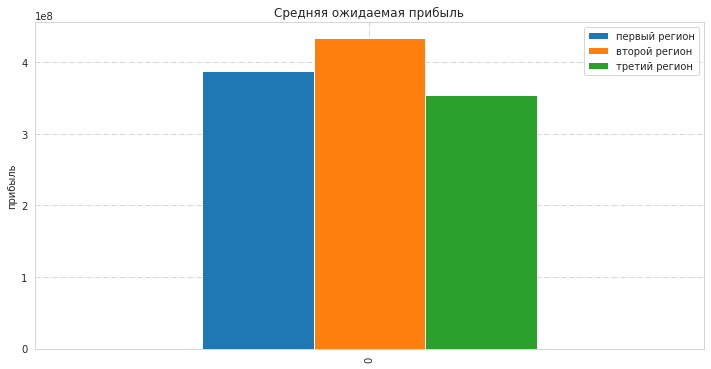

In [303]:
profit_data = pd.DataFrame([profit_0.mean(),profit_1.mean(),profit_2.mean()])
ax = profit_data.swapaxes("index", "columns").plot(kind='bar', figsize=(12,6))
plt.ylabel('прибыль')
ax.set_title('Средняя ожидаемая прибыль')
plt.legend(['первый регион','второй регион','третий регион'])

In [304]:
print('Шанс убытка в первом регионе: {:.1%}'.format(profit_0[profit_0<0].count()/1000))
print('Шанс убытка во втором регионе: {:.1%}'.format(profit_1[profit_1<0].count()/1000))
print('Шанс убытка в третьем регионе: {:.1%}'.format(profit_2[profit_2<0].count()/1000))

Шанс убытка в первом регионе: 7.6%
Шанс убытка во втором регионе: 1.1%
Шанс убытка в третьем регионе: 8.2%


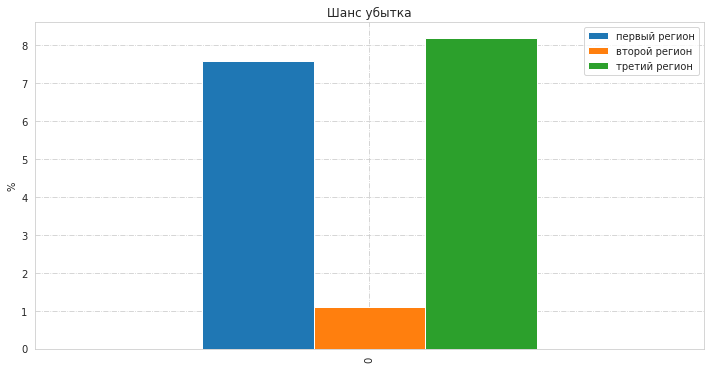

In [305]:
loss_data = pd.DataFrame([profit_0[profit_0<0].count()/10, profit_1[profit_1<0].count()/10, profit_2[profit_2<0].count()/10])
ax = loss_data.swapaxes("index", "columns").plot(kind='bar', figsize=(12,6))
ax.set_title('Шанс убытка')
plt.ylabel('%')
plt.legend(['первый регион','второй регион','третий регион'])


Text(0.5, 0, 'возможная прибыль')

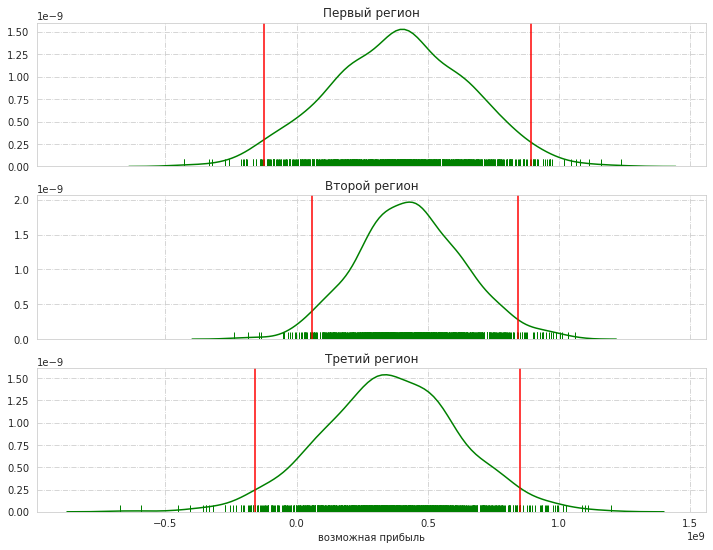

In [306]:
fig, axes = plt.subplots(nrows=3,ncols=1, sharex=True, figsize=(12,9))

sns.distplot(profit_0, hist=False, rug=True, ax=axes[0], color='green')
axes[0].axvline(x=lower_0, color='red')
axes[0].axvline(x=upper_0, color='red')
axes[0].set_title('Первый регион')

sns.distplot(profit_1, hist=False, rug=True, ax=axes[1], color='green')
axes[1].axvline(x=lower_1, color='red')
axes[1].axvline(x=upper_1, color='red')
axes[1].set_title('Второй регион')

sns.distplot(profit_2, hist=False, rug=True, ax=axes[2], color='green')
axes[2].axvline(x=lower_2, color='red')
axes[2].axvline(x=upper_2, color='red')
axes[2].set_title('Третий регион')
plt.xlabel('возможная прибыль')

# Общий вывод

По условию задачи, веротность убытков ниже 2.5% только у второго региона, поэтому это единственный регион, в котором я бы рекомендовал проводить.

Даже если не смотреть на это условие и изучить данные и графики, то, не зависимо от веротности убытков, второй регион имеет наибольшую среднюю прибыль, а также самый надежный доверительный 95%-ный интервал, в который не входят отрицательные значения. 